In [3]:
import pandas as pd

data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()
#data.tail()
#data.shape

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


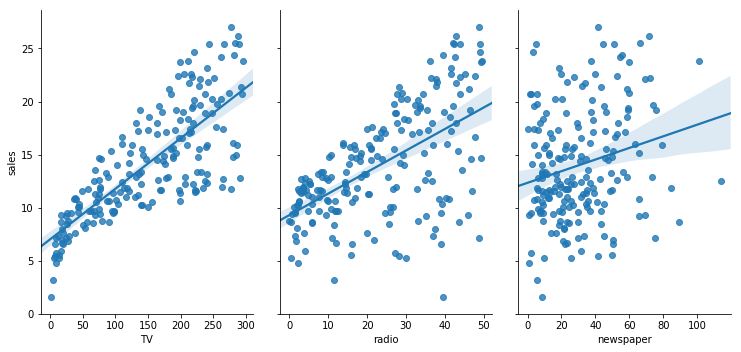

In [4]:
import seaborn as sb
sb.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],size=5,aspect=0.7,kind='reg')#aspect=size of dots

# Preparing x and y

In [5]:
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
x.head()


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [6]:
print(x.shape)
print(type(x))

(200, 3)
<class 'pandas.core.frame.DataFrame'>


In [7]:
y=data['sales']
y.head()
#print(y.shape)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

# Spliting x & y into train & test sets

In [8]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

C:\Users\AMR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#train=data//test=target

print(x_train.shape)   
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Modeling (Linear Regression)

In [10]:
from sklearn.linear_model import LinearRegression
#instantiate
linreg=LinearRegression()
#fitting the model into training data
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Interpreting the model coefficients

In [11]:
print(linreg.intercept_)#Intercet
print(linreg.coef_)#Coefficient

2.756191201230493
[ 4.74956429e-02  1.81921074e-01 -1.33533080e-04]


In [12]:
zip(feature_cols,linreg.coef_)


In [13]:
for a,b in zip(feature_cols,linreg.coef_):
    print([a,b])

['TV', 0.047495642897747666]
['radio', 0.18192107429627913]
['newspaper', -0.00013353307991548598]


y=2.824161324439615+( 0.04598466121529939 * TV)+(0.18800694955939837 * radio)+(0.00034014254739017684 * Newspaper)

# Make Predictions

In [14]:
y_pred=linreg.predict(x_test)

# Computing the RMSE

In [15]:
from sklearn import metrics
import numpy as np
pred_accuracy=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(pred_accuracy)

1.5567701242805136
